# Evaluate: ROC curve

In [55]:
from sklearn.metrics import roc_curve, auc
#roc_curve?
from joblib import Parallel, delayed
from bayes_window.generative_models import generate_fake_lfp
from bayes_window import workflow, models
import numpy as np

def run_condition(true_slope,dist_y='student', y='Log power'):
    df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=true_slope,
                                                     n_trials=20)
    bw=workflow.BayesWindow(df,y=y, levels=('stim', 'mouse'))
    bw.fit_slopes(add_data=False, model=models.model_hier_stim_one_codition,dist_y=dist_y)
    return bw.data_and_posterior['lower HDI'].iloc[0]

true_slopes = np.hstack([np.zeros(5 ),np.arange(.03,4,1.03)])

#y_score=[run_condition(true_slope) for true_slope in true_slopes]

    
true_slopes.shape

(183,)

In [ ]:
import itertools
from tqdm import tqdm
y_scores={}
for dist_y, y in itertools.product(['lognormal','student','normal'], 
                                   ['Power', 'Log power']):
    y_scores[f'{dist_y}, {y}']= Parallel(n_jobs=12,verbose=2)(
        delayed(run_condition)(true_slope) for true_slope in true_slopes)


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   46.8s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 183 out of 183 | elapsed:  5.7min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   43.2s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 183 out of 183 | elapsed:  5.7min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   39.7s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 183 out of 183 | elapsed:  5.7min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   42.7s
[Parallel(n_jobs=12)]: Done 138 tasks      | 

In [ ]:
import matplotlib.pylab as plt
aucs={}
for condition,y_score in y_scores.items():
    y_score=np.array(y_score)
    y_score[y_score<0]=0
    fpr, tpr, _ = roc_curve(true_slopes>0, y_score)
    roc_auc = round(auc(fpr, tpr),2)
    aucs[condition]=roc_auc
    plt.plot(fpr, tpr,'.-', #color='darkorange',
             label=f'{condition} (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

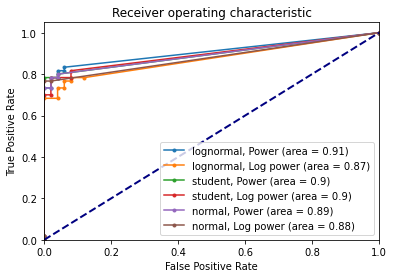

In [52]:
aucs

{'lognormal, Power': 0.91,
 'lognormal, Log power': 0.87,
 'student, Power': 0.9,
 'student, Log power': 0.9,
 'normal, Power': 0.89,
 'normal, Log power': 0.88}